In [1]:
import taunet_utils
from os.path import join
import pandas as pd
import seaborn as sns
import json

In [2]:
input_data, output_data = taunet_utils.create_dataset(join("dataset", "audio"), 
                                                      join("dataset", "human_input", "AITD_Dataset_Kristof_beta_1.csv"),
                                                      join("..", "src", "af", "AFInC.dll"),
                                                      join("dataset", "saved", "AITD_Dataset_Kristof_beta_1.json"))

with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1in.json"), "r") as json_file:
    input_data = json.load(json_file)
with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1out.json"), "r") as json_file:
    output_data = json.load(json_file)

data = dict()
for key in input_data.keys():
    data[key] = input_data[key] + output_data[key]
print(data)
df = pd.DataFrame.from_dict(data).T
df.index = df.index.astype(int)
df = df.sort_index()
df.columns = ["TEMPO",
              "T1A", 
              "T2A", 
              "CENTROID", 
              "FLATNESS", 
              "L", 
              "ML", 
              "MH", 
              "H", 
              "CREST",
              "FLUX",
              "ATTACK_GAIN",
              "SUSTAIN_GAIN",
              "ATTACK_T1",
              "SUSTAIN_T1"]
df.head()

{'1': [0.7748, 0.012, 0.2251, 0.1621, 0.1335, 0.4836, 0.5895, 0.1336, 0.0194, 0.1007, 0.0475, 0.6738, 0.8758, 0.7210246, 0.3815809], '2': [0.9566, 0.0322, 0.1695, 0.111, 0.1284, 0.6706, 0.2561, 0.0526, 0.035, 0.0238, 0.0945, 0.7384, 0.2437, 0.9999503999999999, 0.1248695], '3': [0.5347, 0.0236, 0.3093, 0.0635, 0.1078, 0.5009, 0.3548, 0.1477, 0.0242, 0.049, 0.0797, 0.2224, 0.9991, 0.0452408, 0.6440535333333333], '4': [0.567, 0.0294, 0.312, 0.0813, 0.1557, 0.639, 0.6673, 0.2165, 0.0254, 0.0805, 0.0533, 0.6711, 0.8347, 0.2988928, 0.4453225], '5': [0.6793, 0.012, 0.2543, 0.1456, 0.0491, 0.6359, 0.2842, 0.046, 0.0249, 0.055, 0.1009, 0.6149, 0.8181, 0.7027057999999999, 0.5654544666666667], '6': [0.543, 0.0087, 0.1529, 0.2627, 0.0063, 0.0794, 0.1626, 0.2719, 0.2605, 0.0991, 0.189, 0.2, 0.9179, 0.1832008, 0.8069385333333333], '7': [0.5835, 0.0172, 0.3052, 0.1932, 0.0524, 0.5275, 0.5217, 0.1129, 0.043, 0.0948, 0.0886, 0.6255, 0.4053, 0.9999752, 0.07385166666666666], '8': [0.6222, 0.0269, 0.1893,

,TEMPO,T1A,T2A,CENTROID,FLATNESS,L,ML,MH,H,CREST,FLUX,ATTACK_GAIN,SUSTAIN_GAIN,ATTACK_T1,SUSTAIN_T1
1,0.7748,0.0120,0.2251,0.1621,0.1335,0.4836,0.5895,0.1336,0.0194,0.1007,0.0475,0.6738,0.8758,0.721025,0.381581
2,0.9566,0.0322,0.1695,0.1110,0.1284,0.6706,0.2561,0.0526,0.0350,0.0238,0.0945,0.7384,0.2437,0.999950,0.124869
3,0.5347,0.0236,0.3093,0.0635,0.1078,0.5009,0.3548,0.1477,0.0242,0.0490,0.0797,0.2224,0.9991,0.045241,0.644054
4,0.5670,0.0294,0.3120,0.0813,0.1557,0.6390,0.6673,0.2165,0.0254,0.0805,0.0533,0.6711,0.8347,0.298893,0.445323
5,0.6793,0.0120,0.2543,0.1456,0.0491,0.6359,0.2842,0.0460,0.0249,0.0550,0.1009,0.6149,0.8181,0.702706,0.565454


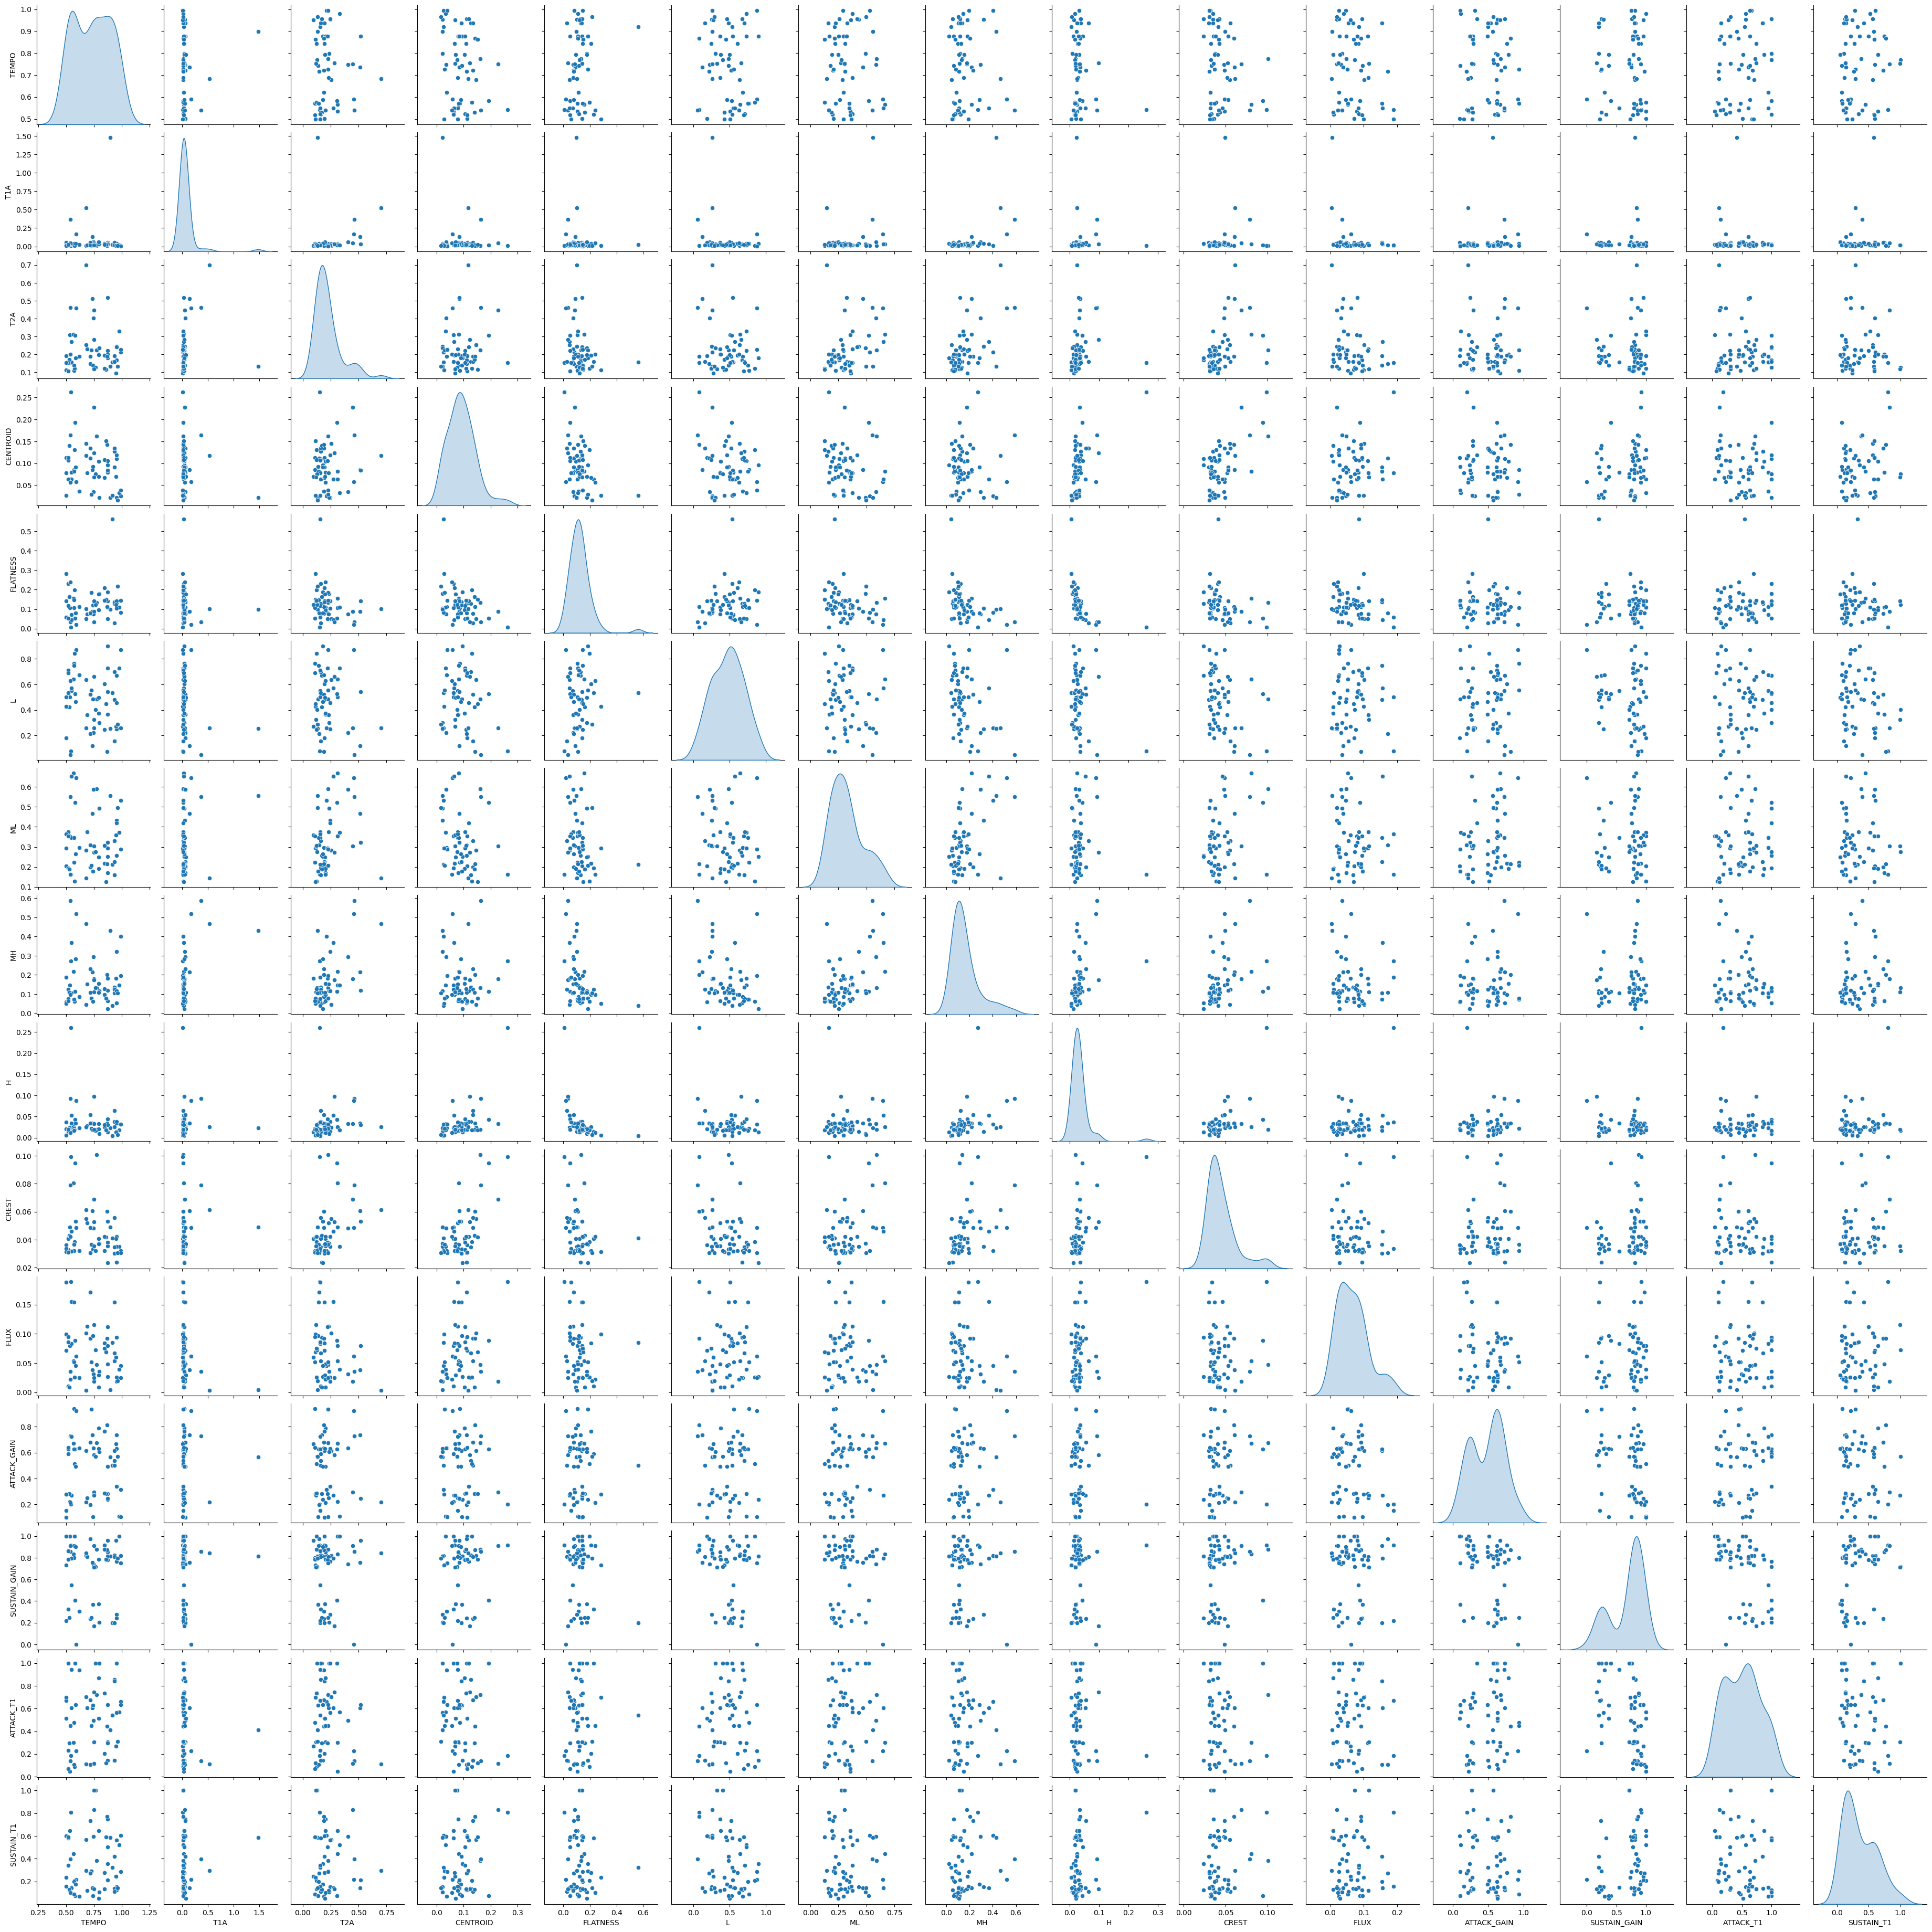

In [3]:

sns.pairplot(data=df, diag_kind='kde')